# Stored Map Generation

In [ ]:
# =============================================================================
# DEVELOPMENT MODE TOGGLE
# =============================================================================
USE_LOCAL_SOURCE = False  # <-- TOGGLE THIS

if USE_LOCAL_SOURCE:
    import sys
    from pathlib import Path
    local_path = str(Path.cwd().parent)
    if local_path not in sys.path:
        sys.path.insert(0, local_path)
    print(f"📁 LOCAL SOURCE MODE: Loading from {local_path}/ras_commander")
else:
    print("📦 PIP PACKAGE MODE: Loading installed ras-commander")

# Import ras-commander
from ras_commander import *

# Additional imports for this notebook
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Verify which version loaded
import ras_commander
print(f"✓ Loaded: {ras_commander.__file__}")

# RAS Commander: Post-Processing Stored Maps

This notebook demonstrates how to automate the generation of stored floodplain map outputs (like `.tif` files for Depth, WSEL, and Velocity) using the `ras-commander` library. This is a common post-processing step that can be time-consuming to do manually for multiple plans.

## Workflow

1.  **Initialize Project**: Set up the HEC-RAS project.
2.  **Run Simulation**: Ensure a plan has been computed to generate base results.
3.  **Automate Post-Processing**: Use the new `RasMap.postprocess_stored_maps` function to:
    -   Modify the `.rasmap` file to include stored map definitions.
    -   Update plan flags to *only* run the floodplain mapping component.
    -   Execute the plan, which quickly generates the `.tif` files.
    -   Restore the original plan and `.rasmap` files, keeping the new map layers.
4.  **Verify Output**: Load and visualize one of the generated `.tif` files to confirm success.

# Install necessary packages if not already installed
!pip install --upgrade ras-commander
!pip install rasterio

## Run with Full Windows GUI

[RAS Commander Stored Map Assistant](https://github.com/gpt-cmdr/ras-stored-map-assistant)  (Coming soon)

In [2]:
# For Development Mode, add the parent directory to the Python path
import os
import sys
from pathlib import Path

current_file = Path(os.getcwd()).resolve()
rascmdr_directory = current_file.parent

# Use insert(0) instead of append() to give highest priority to local version
if str(rascmdr_directory) not in sys.path:
    sys.path.insert(0, str(rascmdr_directory))
    
print("Loading ras-commander from local dev copy")

# Now try to import again
from ras_commander import *

# Verify we're loading from the local copy
import ras_commander
local_path = Path(ras_commander.__file__).parent.parent
print(f"ras-commander loaded from: {local_path}")
print(f"Expected local path: {rascmdr_directory}")
print(f"Successfully using local copy: {local_path == rascmdr_directory}")


Loading ras-commander from local dev copy
ras-commander loaded from: c:\Users\billk_clb\anaconda3\envs\rascmdr_piptest\Lib\site-packages
Expected local path: C:\GH\ras-commander
Successfully using local copy: False


# Install necessary packages if not already installed
!pip install --upgrade ras-commander
!pip install rasterio

## Step 1: Prepare the HEC-RAS Project

First, we'll use `RasExamples` to get the `BaldEagleCrkMulti2D` project. Then, we'll run **Plan 06** to ensure we have a base set of results to work with. If the results already exist, the execution will be skipped.

## Step 2: Use `postprocess_stored_maps` to Generate Floodplain Maps

Now we'll call the new function. It will handle all the file modifications, run HEC-RAS in mapping-only mode, and clean up afterwards.

In [6]:
# NOTE: For HEC-RAS 5.0.7 projects being run in HEC-RAS 6.x, you must manually open Ras.exe and use RASMapper to generate easmapper entries.
# This step is only required for 5.0.7 projects run in 6.x.

In [ ]:
# =============================================================================
# Upgrade .rasmap file for HEC-RAS 5.0.7 projects running in 6.x
# =============================================================================
# This project was created in HEC-RAS 5.0.7. When running in HEC-RAS 6.x,
# the .rasmap file must be upgraded to the new format before generating stored maps.
#
# Opening RASMapper automatically triggers this upgrade. We use the library
# function RasGuiAutomation.open_rasmapper() which:
#   1. Opens HEC-RAS with the current project
#   2. Opens RASMapper via the GIS Tools menu
#   3. Waits for the user to close RASMapper/HEC-RAS
#
# When RASMapper opens, it will prompt to upgrade the .rasmap file if needed.
# Click "Yes" to upgrade, then close RASMapper and HEC-RAS to continue.

print("Opening RASMapper to upgrade .rasmap file to version 6.x...")
print("When prompted, click 'Yes' to upgrade the .rasmap file.")
print("Then close RASMapper and HEC-RAS to continue.\n")

success = RasGuiAutomation.open_rasmapper(wait_for_user=True, timeout=300)

if success:
    print("\nRASMapper closed. .rasmap file has been upgraded.")
else:
    print("\nWarning: RASMapper may not have opened successfully.")
    print("You may need to manually open HEC-RAS → GIS Tools → RAS Mapper to upgrade the .rasmap file.")

# NOTE: You MUST open the HEC-RAS Main Window for Floodplain Mapping to Work

This is being massively improved in HEC-RAS 2025, but for now can't use the -c flag to compute floodplain maps like we do for unsteady computations.  

There should also be a way to implement this with Win32COM (similar to above), but for now opening the window is required. 

In [9]:
# First, let's get the names of available terrains
rasmap_path = ras.project_folder / f"{ras.project_name}.rasmap"
terrains = RasMap.get_terrain_names(rasmap_path)
print(f"Available terrains: {terrains}")

# Specify the terrain we want to use for mapping
target_terrain = None
if terrains:
    target_terrain = terrains[0]
    print(f"Using terrain: {target_terrain}")

# Generate the stored maps for our plan and terrain
success = RasMap.postprocess_stored_maps(
    plan_number=plan_number,
    specify_terrain=target_terrain,
    layers=['Depth', 'WSEL']  # Let's just generate Depth and WSEL for this example
)

if success:
    print("Successfully generated stored maps.")
else:
    print("Failed to generate stored maps.")

2025-11-17 21:31:10 - ras_commander.RasMap - INFO - Extracted terrain names: ['Terrain50']
2025-11-17 21:31:10 - ras_commander.RasMap - INFO - Backing up plan file C:\GH\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p06 to C:\GH\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p06.storedmap.bak
2025-11-17 21:31:10 - ras_commander.RasMap - INFO - Updating plan run flags for floodplain mapping for plan 06...
2025-11-17 21:31:10 - ras_commander.RasPlan - INFO - Successfully updated run flags in plan file: C:\GH\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p06 (flags modified: 4)
2025-11-17 21:31:10 - ras_commander.RasMap - INFO - Backing up rasmap file C:\GH\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.rasmap to C:\GH\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.rasmap.storedmap.bak
2025-11-17 21:31:10 - ras_commander.RasMap - INFO - Added '

Available terrains: ['Terrain50']
Using terrain: Terrain50


2025-11-17 21:31:13 - ras_commander.RasGuiAutomation - INFO - Found HEC-RAS main window: HEC-RAS 6.6
2025-11-17 21:31:14 - ras_commander.RasGuiAutomation - INFO - Clicking 'Run > Unsteady Flow Analysis' menu...
2025-11-17 21:31:14 - ras_commander.RasGuiAutomation - INFO - Clicked menu item ID: 47
2025-11-17 21:31:16 - ras_commander.RasGuiAutomation - INFO - Looking for Unsteady Flow Analysis dialog...
2025-11-17 21:31:16 - ras_commander.RasGuiAutomation - INFO - Found Unsteady Flow Analysis dialog
2025-11-17 21:31:16 - ras_commander.RasGuiAutomation - INFO - Looking for Compute button...
2025-11-17 21:31:16 - ras_commander.RasGuiAutomation - WARNING - Could not find Compute button - user must click manually
2025-11-17 21:31:16 - ras_commander.RasGuiAutomation - INFO - Trying keyboard shortcut as fallback...
2025-11-17 21:31:17 - ras_commander.RasGuiAutomation - INFO - Sent Enter key to dialog
2025-11-17 21:31:17 - ras_commander.RasGuiAutomation - INFO - Waiting for user to close HEC-RA

Successfully generated stored maps.


## Step 3: Verify the Output

The `postprocess_stored_maps` function should have created a folder named after the plan's `Short Identifier` (or the plan name if no short ID exists) inside the project directory. Let's find the generated `.tif` file for Depth and visualize it.

Found depth map at: C:\GH\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\Grid Precip Infiltration\Depth (Max).vrt


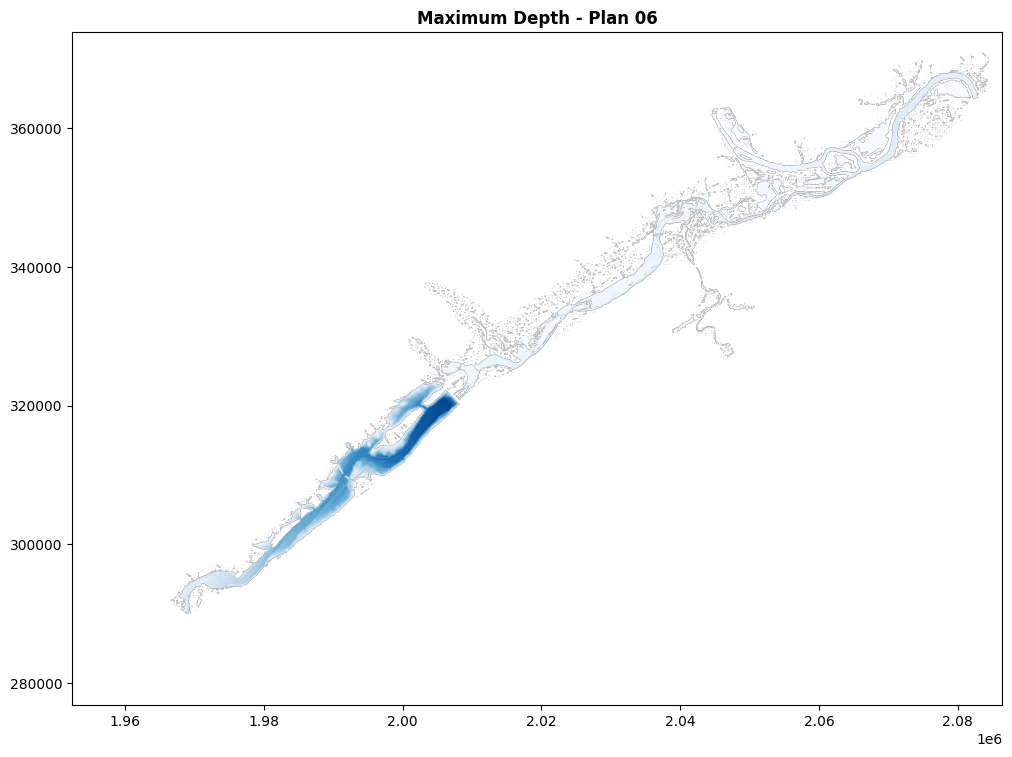

In [10]:
# Find the output directory and the depth map file
plan_info = ras.plan_df[ras.plan_df['plan_number'] == plan_number].iloc[0]
short_id = plan_info.get('Short Identifier', f'Plan_{plan_number}')
output_folder = ras.project_folder / short_id

# HEC-RAS creates a VRT file that points to the actual TIF(s)
depth_map_path = output_folder / "Depth (Max).vrt"

if depth_map_path.exists():
    print(f"Found depth map at: {depth_map_path}")

    # Open and plot the raster using rasterio
    with rasterio.open(depth_map_path) as src:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        show(src, ax=ax, cmap='Blues', title=f'Maximum Depth - Plan {plan_number}')
        plt.show()
else:
    print(f"Could not find the generated depth map at {depth_map_path}")

## Conclusion

This notebook demonstrated how to use the `RasMap.postprocess_stored_maps` function to automate a critical post-processing step. By programmatically generating stored maps, you can easily create the necessary outputs for all your plans without manual intervention in the RASMapper interface, significantly speeding up workflows that involve multiple scenarios or models.